<a href="https://colab.research.google.com/github/codened/DataStorm-4.0/blob/main/stormingRound/DataStorm_4_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.dtreeg" alt="Open In Colab"/></a>

Path 
stormingRound/DataStorm_4_0.ipynb

# Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Data Sets

In [2]:
rawHisTransDF=pd.read_csv('Historical-transaction-data.csv')
rawStoreInfDF=pd.read_csv('Store-info.csv')
rawTestDF=pd.read_csv('Testing-data.csv')

#### Viewing Dataframe

In [3]:
rawHisTransDF.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,2
1,GINGER BEER 1.5L,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,2
2,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,2
3,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,2
4,STRAWBERRY MILK 180ML,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,5


In [4]:
rawStoreInfDF.head()

,shop_id,shop_area_sq_ft,shop_profile
0,SHOP047,528,Moderate
1,SHOP009,676,High
2,SHOP083,676,Low
3,SHOP117,676,Low
4,SHOP042,676,Low


# Data Pre Processing

### Fixing Data

In [5]:
# convert the date string column to datetime
rawHisTransDF['transaction_date'] = pd.to_datetime(rawHisTransDF['transaction_date'], format='%Y/%m/%d').dt.date

In [6]:
# Performing left join
merged_df = pd.merge(rawHisTransDF, rawStoreInfDF, on='shop_id', how='left')

In [7]:
rawHisTransDF.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
item_description,438046,37,GINGER BEER 1.5L,59864,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transaction_date,473974,62,2021-12-11,15125,NaN,NaN,NaN,NaN,NaN,NaN,NaN
invoice_id,467654.0,NaN,NaN,NaN,1996684.006321,1344594.276666,17.0,1032113.75,2032996.0,3032568.25,8331754.0
customer_id,473974,191636,RX33,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN
shop_id,473974,124,SHOP043,6631,NaN,NaN,NaN,NaN,NaN,NaN,NaN
item_price,473974.0,NaN,NaN,NaN,206.689734,166.764732,35.0,100.0,200.0,220.0,17400.0
quantity_sold,473974.0,NaN,NaN,NaN,1.925506,1.634535,-1.0,1.0,2.0,2.0,101.0


In [8]:
# get count of null values in each column
null_counts = merged_df.isnull().sum()
# print the counts
print(null_counts)

item_description    35928
transaction_date        0
invoice_id           6320
customer_id             0
shop_id                 0
item_price              0
quantity_sold           0
shop_area_sq_ft         0
shop_profile        86633
dtype: int64


In [9]:
merged_df.dropna(subset=['item_description','invoice_id'], inplace=True)

In [10]:
# get count of null values in each column
null_counts = merged_df.isnull().sum()
# print the counts
print(null_counts)

item_description        0
transaction_date        0
invoice_id              0
customer_id             0
shop_id                 0
item_price              0
quantity_sold           0
shop_area_sq_ft         0
shop_profile        79471
dtype: int64


In [11]:
merged_df.drop_duplicates(inplace=True)

### Encoding 

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
merged_df['item_description'] = le.fit_transform(merged_df['item_description'])
merged_df['customer_id'] = le.fit_transform(merged_df['customer_id'])

In [13]:
merged_df['shop_id'] = merged_df['shop_id'].str.replace(r'^SHOP', '').astype(int)

C:\Users\gw\AppData\Local\Temp\ipykernel_29740\2624828608.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  merged_df['shop_id'] = merged_df['shop_id'].str.replace(r'^SHOP', '').astype(int)


In [14]:
merged_df['shop_profile'] = merged_df['shop_profile'].replace({'High': 1, 'Moderate': 2, 'Low': 3})
merged_df['shop_profile'] = merged_df['shop_profile'].fillna(0.0).astype(int)
merged_df['invoice_id'] = merged_df['invoice_id'].astype(int)

In [15]:
merged_df


,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile
0,27,2021-12-11,147,57272,8,220,2,678,2
1,14,2021-10-17,371,91334,112,220,2,668,2
2,35,2021-12-13,484,158179,8,160,2,678,2
3,4,2021-12-13,484,158179,8,150,2,678,2
4,34,2021-10-23,1310,38862,112,210,5,668,2
...,...,...,...,...,...,...,...,...,...
473820,13,2021-11-14,8014206,176899,3,60,2,810,1
473821,1,2021-10-16,8304754,52159,127,35,2,848,1
473822,14,2021-10-16,8304807,95280,127,220,1,848,1
473823,1,2021-11-07,8313570,8748,127,35,1,848,1


In [16]:
print(merged_df[merged_df['quantity_sold'] == 0])

        item_description transaction_date  invoice_id  customer_id  shop_id  \
54                     5       2021-12-09       24423        70620        3   
103                   32       2021-10-31       31745       177679       90   
230                    3       2021-12-10       52904        26069       40   
273                   24       2021-11-12       59336       154510      103   
465                   22       2021-11-10      111021       100682       32   
...                  ...              ...         ...          ...      ...   
473258                 5       2021-12-04     4363428       108185      113   
473355                32       2021-11-21     4479312       154031       62   
473412                 0       2021-11-13     4603720        68657       58   
473462                35       2021-12-10     4653601        63057       77   
473500                11       2021-10-27     4798624        37513      127   

        item_price  quantity_sold  shop_area_sq_ft 

In [17]:
merged_df = merged_df[merged_df['quantity_sold'] != 0]

In [18]:
merged_df

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile
0,27,2021-12-11,147,57272,8,220,2,678,2
1,14,2021-10-17,371,91334,112,220,2,668,2
2,35,2021-12-13,484,158179,8,160,2,678,2
3,4,2021-12-13,484,158179,8,150,2,678,2
4,34,2021-10-23,1310,38862,112,210,5,668,2
...,...,...,...,...,...,...,...,...,...
473820,13,2021-11-14,8014206,176899,3,60,2,810,1
473821,1,2021-10-16,8304754,52159,127,35,2,848,1
473822,14,2021-10-16,8304807,95280,127,220,1,848,1
473823,1,2021-11-07,8313570,8748,127,35,1,848,1


# Feature Engineering

### Feature Creation

In [19]:
merged_df['full_price'] = merged_df['quantity_sold'] * merged_df['item_price']

C:\Users\gw\AppData\Local\Temp\ipykernel_29740\2634474984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['full_price'] = merged_df['quantity_sold'] * merged_df['item_price']


#### creating Avarage daily sales for each shop

In [20]:
merged_df['Daily_Sales'] = merged_df.groupby(['shop_id', 'transaction_date'])['full_price'].transform('sum')


C:\Users\gw\AppData\Local\Temp\ipykernel_29740\1755121770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Daily_Sales'] = merged_df.groupby(['shop_id', 'transaction_date'])['full_price'].transform('sum')


In [21]:
merged_df

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile,full_price,Daily_Sales
0,27,2021-12-11,147,57272,8,220,2,678,2,440,65375
1,14,2021-10-17,371,91334,112,220,2,668,2,440,23290
2,35,2021-12-13,484,158179,8,160,2,678,2,320,3625
3,4,2021-12-13,484,158179,8,150,2,678,2,300,3625
4,34,2021-10-23,1310,38862,112,210,5,668,2,1050,19600
...,...,...,...,...,...,...,...,...,...,...,...
473820,13,2021-11-14,8014206,176899,3,60,2,810,1,120,27765
473821,1,2021-10-16,8304754,52159,127,35,2,848,1,70,33180
473822,14,2021-10-16,8304807,95280,127,220,1,848,1,220,33180
473823,1,2021-11-07,8313570,8748,127,35,1,848,1,35,109150


In [22]:
subset = merged_df.loc[(merged_df['transaction_date'] == pd.to_datetime('2021-12-11')) & (merged_df['shop_id'] == 8)]

C:\Users\gw\AppData\Local\Temp\ipykernel_29740\1990627187.py:1: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  subset = merged_df.loc[(merged_df['transaction_date'] == pd.to_datetime('2021-12-11')) & (merged_df['shop_id'] == 8)]


In [23]:
# Group by shop id and calculate mean of daily_sales column
avg_sales = merged_df.groupby('shop_id')['Daily_Sales'].mean().reset_index()

# Merge the average sales data back into the original dataframe
merged_df = merged_df.merge(avg_sales, on='shop_id', suffixes=('', '_avg'))

# Print the updated dataframe
merged_df.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile,full_price,Daily_Sales,Daily_Sales_avg
0,27,2021-12-11,147,57272,8,220,2,678,2,440,65375,37040.173913
1,35,2021-12-13,484,158179,8,160,2,678,2,320,3625,37040.173913
2,4,2021-12-13,484,158179,8,150,2,678,2,300,3625,37040.173913
3,14,2021-12-10,1000053,159040,8,220,1,678,2,220,27435,37040.173913
4,14,2021-12-10,1000057,43724,8,440,1,678,2,440,27435,37040.173913


#### Full revinew

In [24]:
merged_df['revnew'] = merged_df.groupby(['shop_id'])['full_price'].transform('sum')

In [25]:
merged_df

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile,full_price,Daily_Sales,Daily_Sales_avg,revnew
0,27,2021-12-11,147,57272,8,220,2,678,2,440,65375,37040.173913,121225
1,35,2021-12-13,484,158179,8,160,2,678,2,320,3625,37040.173913,121225
2,4,2021-12-13,484,158179,8,150,2,678,2,300,3625,37040.173913,121225
3,14,2021-12-10,1000053,159040,8,220,1,678,2,220,27435,37040.173913,121225
4,14,2021-12-10,1000057,43724,8,440,1,678,2,440,27435,37040.173913,121225
...,...,...,...,...,...,...,...,...,...,...,...,...,...
394475,12,2021-11-28,7027965,44679,72,290,2,617,1,580,38705,41364.617086,2410580
394476,24,2021-12-03,7029132,4618,72,440,3,617,1,1320,42170,41364.617086,2410580
394477,16,2021-12-08,7030122,63983,72,100,2,617,1,200,20010,41364.617086,2410580
394478,13,2021-12-11,7030809,89595,72,140,2,617,1,280,42000,41364.617086,2410580


#### Revnew per sqr feet of land

In [26]:
merged_df['rev_per_sqfeet'] = (merged_df['revnew'] / merged_df['shop_area_sq_ft']).round().astype(int)


In [27]:
merged_df

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile,full_price,Daily_Sales,Daily_Sales_avg,revnew,rev_per_sqfeet
0,27,2021-12-11,147,57272,8,220,2,678,2,440,65375,37040.173913,121225,179
1,35,2021-12-13,484,158179,8,160,2,678,2,320,3625,37040.173913,121225,179
2,4,2021-12-13,484,158179,8,150,2,678,2,300,3625,37040.173913,121225,179
3,14,2021-12-10,1000053,159040,8,220,1,678,2,220,27435,37040.173913,121225,179
4,14,2021-12-10,1000057,43724,8,440,1,678,2,440,27435,37040.173913,121225,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394475,12,2021-11-28,7027965,44679,72,290,2,617,1,580,38705,41364.617086,2410580,3907
394476,24,2021-12-03,7029132,4618,72,440,3,617,1,1320,42170,41364.617086,2410580,3907
394477,16,2021-12-08,7030122,63983,72,100,2,617,1,200,20010,41364.617086,2410580,3907
394478,13,2021-12-11,7030809,89595,72,140,2,617,1,280,42000,41364.617086,2410580,3907


#### Avarage sold item types per each shop 

In [28]:
# group the original table by Shop ID and Transaction Date and count the unique items sold on each day
daily_items_sold = merged_df.groupby(['shop_id', 'transaction_date'])['item_description'].nunique().reset_index()

# group the resulting table by Shop ID and take the mean of the nunique column
avg_daily_items_sold = daily_items_sold.groupby('shop_id')['item_description'].mean().reset_index()

# rename the columns
avg_daily_items_sold.columns = ['shop_id', 'avd_daily_items_types_sold']
# convert float column to integers
avg_daily_items_sold['avd_daily_items_types_sold'] = avg_daily_items_sold['avd_daily_items_types_sold'].round().astype(int)

# merge with the original dataframe
merged_df = pd.merge(merged_df, avg_daily_items_sold, on='shop_id', how='left')

In [29]:
merged_df

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile,full_price,Daily_Sales,Daily_Sales_avg,revnew,rev_per_sqfeet,avd_daily_items_types_sold
0,27,2021-12-11,147,57272,8,220,2,678,2,440,65375,37040.173913,121225,179,16
1,35,2021-12-13,484,158179,8,160,2,678,2,320,3625,37040.173913,121225,179,16
2,4,2021-12-13,484,158179,8,150,2,678,2,300,3625,37040.173913,121225,179,16
3,14,2021-12-10,1000053,159040,8,220,1,678,2,220,27435,37040.173913,121225,179,16
4,14,2021-12-10,1000057,43724,8,440,1,678,2,440,27435,37040.173913,121225,179,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394475,12,2021-11-28,7027965,44679,72,290,2,617,1,580,38705,41364.617086,2410580,3907,22
394476,24,2021-12-03,7029132,4618,72,440,3,617,1,1320,42170,41364.617086,2410580,3907,22
394477,16,2021-12-08,7030122,63983,72,100,2,617,1,200,20010,41364.617086,2410580,3907,22
394478,13,2021-12-11,7030809,89595,72,140,2,617,1,280,42000,41364.617086,2410580,3907,22


#### Avarage Daily Transactions per each shop

In [30]:
# group the original table by Shop ID and Transaction Date and count the unique items sold on each day
daily_trans = merged_df.groupby(['shop_id', 'transaction_date'])['invoice_id'].nunique().reset_index()

# group the resulting table by Shop ID and take the mean of the nunique column
avg_daily_trans = daily_trans.groupby('shop_id')['invoice_id'].mean().reset_index()

# rename the columns
avg_daily_trans.columns = ['shop_id', 'avd_daily_transctions']
# convert float column to integers
avg_daily_trans['avd_daily_transctions'] = avg_daily_trans['avd_daily_transctions'].round().astype(int)

# merge with the original dataframe
merged_df = pd.merge(merged_df, avg_daily_trans, on='shop_id', how='left')

In [31]:
merged_df

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile,full_price,Daily_Sales,Daily_Sales_avg,revnew,rev_per_sqfeet,avd_daily_items_types_sold,avd_daily_transctions
0,27,2021-12-11,147,57272,8,220,2,678,2,440,65375,37040.173913,121225,179,16,32
1,35,2021-12-13,484,158179,8,160,2,678,2,320,3625,37040.173913,121225,179,16,32
2,4,2021-12-13,484,158179,8,150,2,678,2,300,3625,37040.173913,121225,179,16,32
3,14,2021-12-10,1000053,159040,8,220,1,678,2,220,27435,37040.173913,121225,179,16,32
4,14,2021-12-10,1000057,43724,8,440,1,678,2,440,27435,37040.173913,121225,179,16,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394475,12,2021-11-28,7027965,44679,72,290,2,617,1,580,38705,41364.617086,2410580,3907,22,49
394476,24,2021-12-03,7029132,4618,72,440,3,617,1,1320,42170,41364.617086,2410580,3907,22,49
394477,16,2021-12-08,7030122,63983,72,100,2,617,1,200,20010,41364.617086,2410580,3907,22,49
394478,13,2021-12-11,7030809,89595,72,140,2,617,1,280,42000,41364.617086,2410580,3907,22,49


#### Average number of custemers per day

In [32]:
# group the original table by Shop ID and Transaction Date and count the unique items sold on each day
daily_custemers = merged_df.groupby(['shop_id', 'transaction_date'])['customer_id'].nunique().reset_index()

# group the resulting table by Shop ID and take the mean of the nunique column
avg_daily_custemers = daily_custemers.groupby('shop_id')['customer_id'].mean().reset_index()

# rename the columns
avg_daily_custemers.columns = ['shop_id', 'avd_daily_custemers']
# convert float column to integers
avg_daily_custemers['avd_daily_custemers'] = avg_daily_custemers['avd_daily_custemers'].round().astype(int)

# merge with the original dataframe
merged_df = pd.merge(merged_df, avg_daily_custemers, on='shop_id', how='left')

In [33]:
merged_df

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile,full_price,Daily_Sales,Daily_Sales_avg,revnew,rev_per_sqfeet,avd_daily_items_types_sold,avd_daily_transctions,avd_daily_custemers
0,27,2021-12-11,147,57272,8,220,2,678,2,440,65375,37040.173913,121225,179,16,32,32
1,35,2021-12-13,484,158179,8,160,2,678,2,320,3625,37040.173913,121225,179,16,32,32
2,4,2021-12-13,484,158179,8,150,2,678,2,300,3625,37040.173913,121225,179,16,32,32
3,14,2021-12-10,1000053,159040,8,220,1,678,2,220,27435,37040.173913,121225,179,16,32,32
4,14,2021-12-10,1000057,43724,8,440,1,678,2,440,27435,37040.173913,121225,179,16,32,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394475,12,2021-11-28,7027965,44679,72,290,2,617,1,580,38705,41364.617086,2410580,3907,22,49,48
394476,24,2021-12-03,7029132,4618,72,440,3,617,1,1320,42170,41364.617086,2410580,3907,22,49,48
394477,16,2021-12-08,7030122,63983,72,100,2,617,1,200,20010,41364.617086,2410580,3907,22,49,48
394478,13,2021-12-11,7030809,89595,72,140,2,617,1,280,42000,41364.617086,2410580,3907,22,49,48


#### Persentage of Avarage number of time the same customer returning for the same shop

In [34]:
# calculate the number of times each customer visited each shop
visits = merged_df.groupby(['customer_id', 'shop_id'])['transaction_date'].count()
# calculate the average number of visits per customer per shop
avg_visits = visits.groupby(['shop_id']).mean()*100

avg_visits=avg_visits.round().astype(int)
# create a new DataFrame with the average visits
avg_visits_df = avg_visits.reset_index().rename(columns={'transaction_date': 'avg_visits'})

# merge the new DataFrame with the original DataFrame to add the average visits column
merged_df = pd.merge(merged_df, avg_visits_df, on=['shop_id'])

In [35]:
merged_df

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile,full_price,Daily_Sales,Daily_Sales_avg,revnew,rev_per_sqfeet,avd_daily_items_types_sold,avd_daily_transctions,avd_daily_custemers,avg_visits
0,27,2021-12-11,147,57272,8,220,2,678,2,440,65375,37040.173913,121225,179,16,32,32,127
1,35,2021-12-13,484,158179,8,160,2,678,2,320,3625,37040.173913,121225,179,16,32,32,127
2,4,2021-12-13,484,158179,8,150,2,678,2,300,3625,37040.173913,121225,179,16,32,32,127
3,14,2021-12-10,1000053,159040,8,220,1,678,2,220,27435,37040.173913,121225,179,16,32,32,127
4,14,2021-12-10,1000057,43724,8,440,1,678,2,440,27435,37040.173913,121225,179,16,32,32,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394475,12,2021-11-28,7027965,44679,72,290,2,617,1,580,38705,41364.617086,2410580,3907,22,49,48,157
394476,24,2021-12-03,7029132,4618,72,440,3,617,1,1320,42170,41364.617086,2410580,3907,22,49,48,157
394477,16,2021-12-08,7030122,63983,72,100,2,617,1,200,20010,41364.617086,2410580,3907,22,49,48,157
394478,13,2021-12-11,7030809,89595,72,140,2,617,1,280,42000,41364.617086,2410580,3907,22,49,48,157


# Visualizing

C:\Users\gw\AppData\Local\Temp\ipykernel_29740\3510410926.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = merged_df.corr()


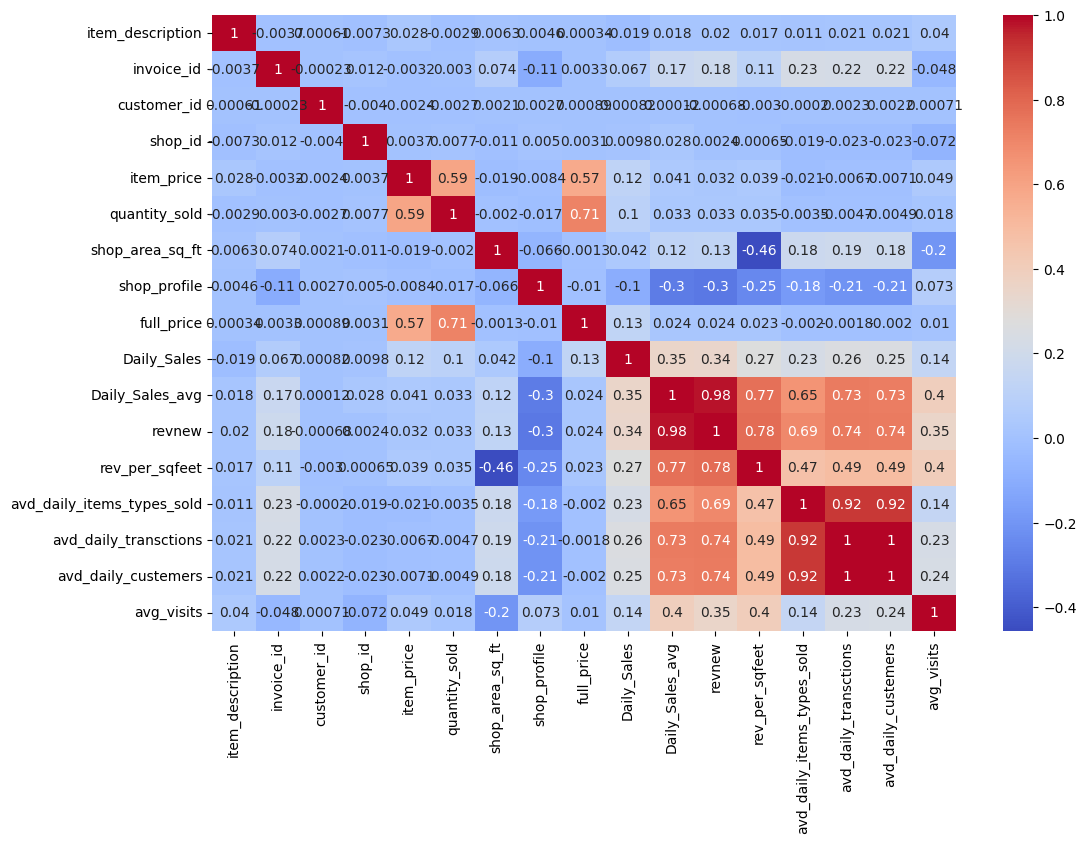

In [36]:
# Create correlation matrix
corr = merged_df.corr()

# Set figure size
plt.figure(figsize=(12, 8))

# Plot correlation matrix as heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Display plot
plt.show()

In [37]:
# Drop highly co related features
cleanedDF = merged_df.drop(['avd_daily_custemers','transaction_date','revnew','item_price','item_description','quantity_sold','full_price','customer_id'], axis=1)

In [38]:
# drop duplicates
cleanedDF.drop_duplicates(inplace=True)

In [39]:
cleanedDF

,invoice_id,shop_id,shop_area_sq_ft,shop_profile,Daily_Sales,Daily_Sales_avg,rev_per_sqfeet,avd_daily_items_types_sold,avd_daily_transctions,avg_visits
0,147,8,678,2,65375,37040.173913,179,16,32,127
1,484,8,678,2,3625,37040.173913,179,16,32,127
3,1000053,8,678,2,27435,37040.173913,179,16,32,127
4,1000057,8,678,2,27435,37040.173913,179,16,32,127
5,2000106,8,678,2,27435,37040.173913,179,16,32,127
...,...,...,...,...,...,...,...,...,...,...
394475,7027965,72,617,1,38705,41364.617086,3907,22,49,157
394476,7029132,72,617,1,42170,41364.617086,3907,22,49,157
394477,7030122,72,617,1,20010,41364.617086,3907,22,49,157
394478,7030809,72,617,1,42000,41364.617086,3907,22,49,157


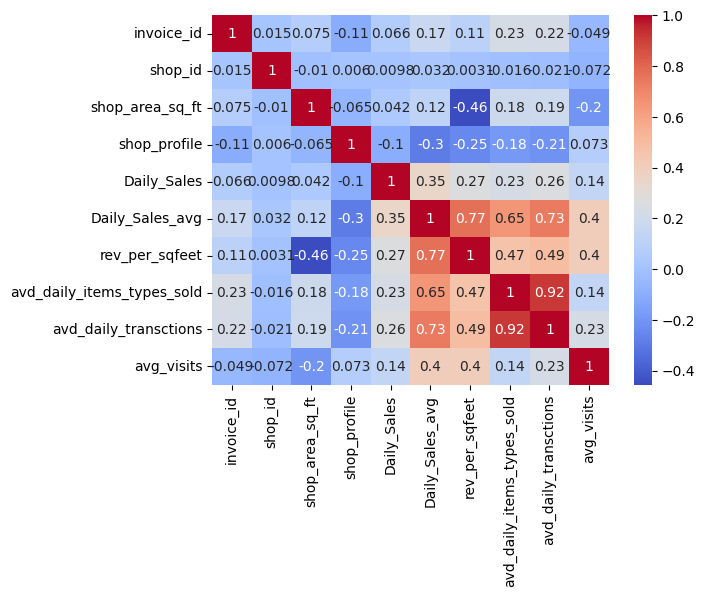

In [40]:
# Create correlation matrix
corr = cleanedDF.corr()

# # Set figure size
# plt.figure(figsize=(12, 8))

# Plot correlation matrix as heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Display plot
plt.show()

# Split To Test and Train Data

In [41]:
# Split the DataFrame into two based on column B
TestDF = cleanedDF[cleanedDF['shop_profile'] == 0].drop(['shop_profile'], axis=1)
TrainDF = cleanedDF[cleanedDF['shop_profile'] != 0]

In [42]:
# reset index
TestDF=TestDF.reset_index(drop=True)
TrainDF=TrainDF.reset_index(drop=True)

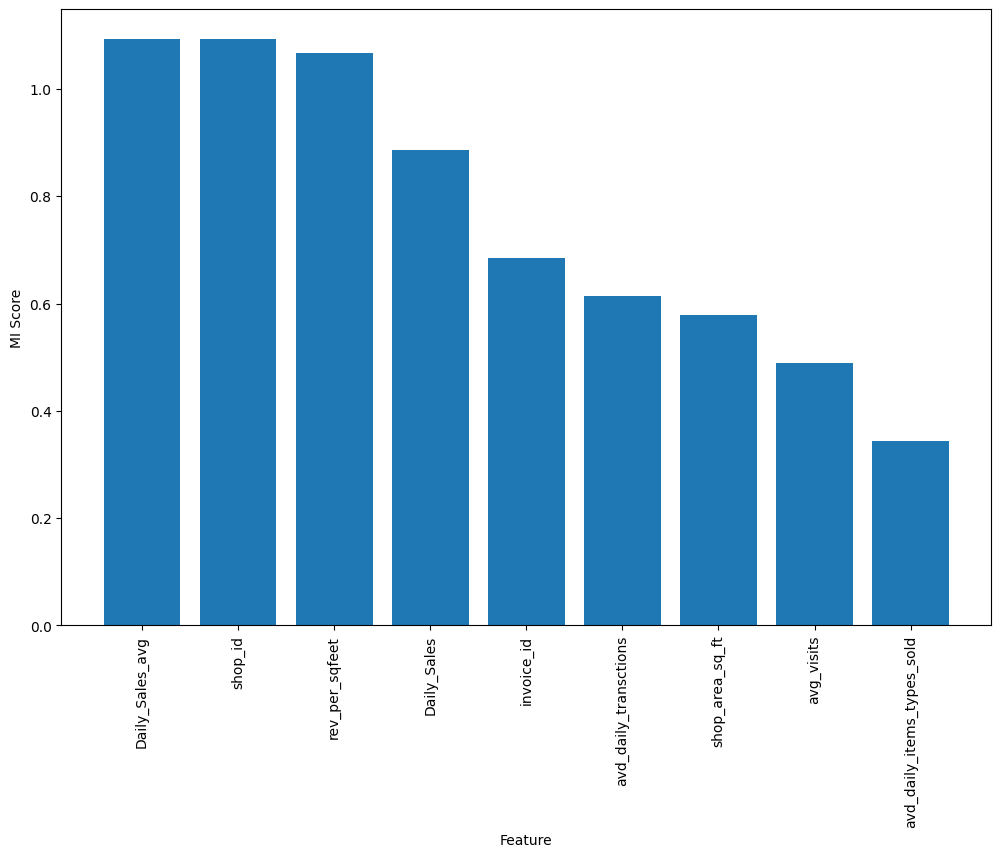

In [43]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

# Separate the target variable
X = TrainDF.drop(['shop_profile'], axis=1)
y = TrainDF['shop_profile']

# Compute MI scores
mi_scores = mutual_info_classif(X, y)

# Convert to DataFrame and sort by MI score
mi_scores_df = pd.DataFrame({'feature': X.columns, 'mi_score': mi_scores})
mi_scores_df = mi_scores_df.sort_values('mi_score', ascending=False)

# Plot bar chart of MI scores
plt.figure(figsize=(12,8))
plt.bar(mi_scores_df['feature'], mi_scores_df['mi_score'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('MI Score')
plt.show()

In [44]:
# Split Fulldata into training and testing sets
from sklearn.model_selection import train_test_split

column_name = 'shop_id'
unique_categories = TrainDF[column_name].nunique()
categories_in_dataset_1 = int(unique_categories * 0.6)
categories_in_dataset_2 = unique_categories - categories_in_dataset_1
dataset_1_categories = TrainDF[column_name].unique()[:categories_in_dataset_1]
dataset_2_categories = TrainDF[column_name].unique()[categories_in_dataset_1:]

train_data = TrainDF[TrainDF[column_name].isin(dataset_1_categories)]
test_data = TrainDF[TrainDF[column_name].isin(dataset_2_categories)]





#train_data, test_data = train_test_split(TrainDF, test_size=0.01)

In [45]:
test_data=test_data.reset_index(drop=True)
train_data=train_data.reset_index(drop=True)

In [46]:
# remove store id from the training and testing sets

train_data_noID = train_data.drop(['shop_id'], axis=1)
test_data_noID = test_data.drop(['shop_id'], axis=1)

# XG boost

In [47]:
train_data_noID['shop_profile'] = train_data_noID['shop_profile'].replace({1: 0, 2: 1, 3: 2})
test_data_noID['shop_profile'] = test_data_noID['shop_profile'].replace({1: 0, 2: 1, 3: 2})

In [48]:

# import xgboost as xgb
# from sklearn.model_selection import GridSearchCV, train_test_split

# # Split data into training and test sets
# X_train=train_data_noID.drop('shop_profile', axis=1)
# y_train=train_data_noID['shop_profile']
# X_test=test_data_noID.drop('shop_profile', axis=1)
# y_test=test_data_noID['shop_profile']

# # Set the parameters for grid search
# params = {
#     'n_estimators': [100, 500, 1000],
#     'learning_rate': [0.01, 0.1, 1],
#     'max_depth': [3, 5, 7],
#     'subsample': [0.5, 0.75, 1],
#     'colsample_bytree': [0.5, 0.75, 1],
#     'objective': ['multi:softmax', 'multi:softprob'],
#     'num_class': [3],
#     'tree_method': ['gpu_hist']
# }

# # Initialize the XGBoost classifier
# xgb_model = xgb.XGBClassifier()

# # Perform grid search to find the best hyperparameters
# grid_search = GridSearchCV(estimator=xgb_model, param_grid=params, scoring='accuracy', cv=3, n_jobs=-1, verbose=1)
# grid_search.fit(X_train, y_train)

# # Print the best hyperparameters found by grid search
# print(grid_search.best_params_)

# # Train the model using the best hyperparameters found by grid search
# xgb_model = xgb.XGBClassifier(**grid_search.best_params_)
# xgb_model.fit(X_train, y_train)

# # Make predictions on the test set
# xg_pred = xgb_model.predict(X_test)

# # Evaluate the model's performance on the test set
# accuracy = np.mean(xg_pred == y_test)
# print('Accuracy:', accuracy)



Best hyperparameters:  {'subsample': 1.0, 'reg_lambda': 0, 'reg_alpha': 0.1, 'n_estimators': 1000, 'max_depth': 7, 'learning_rate': 0.01, 'gamma': 0.5, 'colsample_bytree': 0.5}

In [49]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Split data into training and test sets
X_train=train_data_noID.drop('shop_profile', axis=1)
y_train=train_data_noID['shop_profile']
X_test=test_data_noID.drop('shop_profile', axis=1)
y_test=test_data_noID['shop_profile']


# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(tree_method='gpu_hist')

# fit model to training data
xgb_model.fit(X_train, y_train)

# make predictions on test data
xg_pred = xgb_model.predict(X_test)

# evaluate performance of model
mse = mean_squared_error(y_test, xg_pred)
print('MSE:', mse)

MSE: 0.8726907798452854


In [50]:
xg_pred=pd.DataFrame(xg_pred, columns=['shop_profile'])

train_data_noID['shop_profile'] = train_data_noID['shop_profile'].replace({0: 1, 1: 2, 2: 3})
test_data_noID['shop_profile'] = test_data_noID['shop_profile'].replace({0: 1, 1: 2, 2: 3})
xg_pred['shop_profile'] = xg_pred['shop_profile'].replace({0: 1, 1: 2, 2: 3})

In [51]:
# predicted_res = pd.concat([test_data['shop_id'], pred['shop_profile']], axis=1)
# expected_res=test_data[['shop_id', 'shop_profile']]

# pred_mode = predicted_res.groupby('shop_id')['shop_profile'].apply(lambda x: x.mode()[0]).reset_index()
# exp_mode = expected_res.groupby('shop_id')['shop_profile'].apply(lambda x: x.mode()[0]).reset_index()

# # import necessary libraries
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import f1_score

# y_test=exp_mode['shop_profile']
# y_pred=pred_mode['shop_profile']

# # calculate the F1 score for each class
# f1_class0 = f1_score(y_test, y_pred, labels=[1], average='weighted')
# f1_class1 = f1_score(y_test, y_pred, labels=[2], average='weighted')
# f1_class2 = f1_score(y_test, y_pred, labels=[3], average='weighted')

# # calculate the average F1 score
# f1_average = (f1_class0 + f1_class1 + f1_class2) / 3

# # print the results
# print(f"F1 score for class 0: {f1_class0:.2f}")
# print(f"F1 score for class 1: {f1_class1:.2f}")
# print(f"F1 score for class 2: {f1_class2:.2f}")
# print(f"Average F1 score: {f1_average:.2f}")


In [52]:
xg_pred

,shop_profile
0,1
1,1
2,1
3,1
4,1
...,...
119570,1
119571,1
119572,1
119573,1


In [53]:
concatenated_df_XG_res = pd.concat([test_data['shop_id'], xg_pred['shop_profile']], axis=1)
# concatenated_df_XG_res['shop_profile'] = concatenated_df_XG_res['shop_profile'].astype(int)
# concatenated_df_XG_res['shop_id'] = concatenated_df_XG_res['shop_id'].astype(int)

In [54]:
concatenated_df_XG_res

,shop_id,shop_profile
0,111,1
1,111,1
2,111,1
3,111,1
4,111,1
...,...,...
119570,72,1
119571,72,1
119572,72,1
119573,72,1


In [55]:
expected_df_XG=test_data[['shop_id', 'shop_profile']]

In [56]:
expected_df_XG

,shop_id,shop_profile
0,111,1
1,111,1
2,111,1
3,111,1
4,111,1
...,...,...
119570,72,1
119571,72,1
119572,72,1
119573,72,1


In [57]:
# group by 'group' column and calculate mode of 'value' column
XG_res_mode_df = concatenated_df_XG_res.groupby('shop_id')['shop_profile'].apply(lambda x: x.mode()[0]).reset_index()

In [58]:
XG_res_mode_df

,shop_id,shop_profile
0,6,3
1,7,3
2,9,1
3,10,1
4,13,3
5,14,1
6,15,2
7,16,1
8,18,1
9,20,1


In [59]:
# group by 'group' column and calculate mode of 'value' column
XG_exp_mode_df = expected_df_XG.groupby('shop_id')['shop_profile'].apply(lambda x: x.mode()[0]).reset_index()

In [60]:
XG_exp_mode_df

,shop_id,shop_profile
0,6,3
1,7,3
2,9,1
3,10,2
4,13,2
5,14,2
6,15,3
7,16,1
8,18,1
9,20,2


In [61]:
# import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

y_test=XG_exp_mode_df['shop_profile']
y_pred=XG_res_mode_df['shop_profile']

# calculate the F1 score for each class
f1_class0 = f1_score(y_test, y_pred, labels=[1], average='weighted')
f1_class1 = f1_score(y_test, y_pred, labels=[2], average='weighted')
f1_class2 = f1_score(y_test, y_pred, labels=[3], average='weighted')

# calculate the average F1 score
f1_average = (f1_class0 + f1_class1 + f1_class2) / 3

# print the results
print(f"F1 score for class 0: {f1_class0:.2f}")
print(f"F1 score for class 1: {f1_class1:.2f}")
print(f"F1 score for class 2: {f1_class2:.2f}")
print(f"Average F1 score: {f1_average:.2f}")


F1 score for class 0: 0.62
F1 score for class 1: 0.00
F1 score for class 2: 0.45
Average F1 score: 0.36


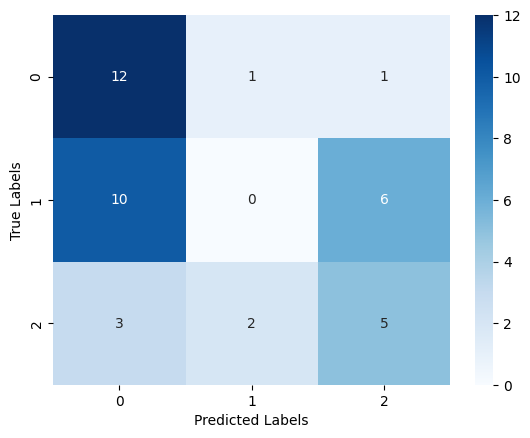

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assume y_true and y_pred are the true and predicted labels, respectively
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


# Random Forrest

In [63]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# Split data into training and test sets
X_train=train_data_noID.drop('shop_profile', axis=1)
y_train=train_data_noID['shop_profile']
X_test=test_data_noID.drop('shop_profile', axis=1)
y_test=test_data_noID['shop_profile']

# Initialize the Random Forest classifier
rfc = RandomForestClassifier(max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=25)

# Train the model on the training data
rfc.fit(X_train, y_train)

# Predict on the testing data
RF_pred = rfc.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, RF_pred)
print("Accuracy:", accuracy)



Accuracy: 0.5234622621785491


In [64]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV, train_test_split
# from sklearn.metrics import classification_report

# # Split data into training and test sets
# X_train=train_data_noID.drop('shop_profile', axis=1)
# y_train=train_data_noID['shop_profile']
# X_test=test_data_noID.drop('shop_profile', axis=1)
# y_test=test_data_noID['shop_profile']

# # Define the parameter grid to search over
# param_grid = {
#     'n_estimators': [50, 100, 150, 200],
#     'max_depth': [10, 20, 30, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt']
# }

# # Create the Random Forest classifier
# rf = RandomForestClassifier(random_state=42)

# # Perform a grid search over the parameter grid with cross-validation
# rf_cv = GridSearchCV(rf, param_grid=param_grid, cv=5, n_jobs=-1)

# # Fit the grid search to the training data
# rf_cv.fit(X_train, y_train)

# # Print the best parameters found by the grid search
# print("Best Parameters:", rf_cv.best_params_)

# # Predict on the test data using the best model
# RF_pred = rf_cv.predict(X_test)

# # Print the classification report
# print(classification_report(y_test, RF_pred))


In [65]:
RF_pred = pd.DataFrame(RF_pred, columns=['shop_profile'])

predicted_res = pd.concat([test_data['shop_id'], RF_pred['shop_profile']], axis=1)
expected_res=test_data[['shop_id', 'shop_profile']]

pred_mode = predicted_res.groupby('shop_id')['shop_profile'].apply(lambda x: x.mode()[0]).reset_index()
exp_mode = expected_res.groupby('shop_id')['shop_profile'].apply(lambda x: x.mode()[0]).reset_index()

# import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

y_test=exp_mode['shop_profile']
y_pred=pred_mode['shop_profile']

# calculate the F1 score for each class
f1_class0 = f1_score(y_test, y_pred, labels=[1], average='weighted')
f1_class1 = f1_score(y_test, y_pred, labels=[2], average='weighted')
f1_class2 = f1_score(y_test, y_pred, labels=[3], average='weighted')

# calculate the average F1 score
f1_average = (f1_class0 + f1_class1 + f1_class2) / 3

# print the results
print(f"F1 score for class 0: {f1_class0:.2f}")
print(f"F1 score for class 1: {f1_class1:.2f}")
print(f"F1 score for class 2: {f1_class2:.2f}")
print(f"Average F1 score: {f1_average:.2f}")

F1 score for class 0: 0.63
F1 score for class 1: 0.33
F1 score for class 2: 0.48
Average F1 score: 0.48


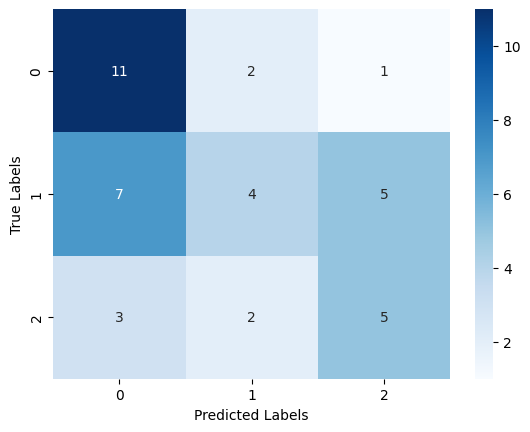

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assume y_true and y_pred are the true and predicted labels, respectively
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [67]:
TestDF

,invoice_id,shop_id,shop_area_sq_ft,Daily_Sales,Daily_Sales_avg,rev_per_sqfeet,avd_daily_items_types_sold,avd_daily_transctions,avg_visits
0,27928,87,527,23960,20176.512253,1989,13,22,168
1,28399,87,527,14215,20176.512253,1989,13,22,168
2,28822,87,527,11940,20176.512253,1989,13,22,168
3,29439,87,527,15000,20176.512253,1989,13,22,168
4,29542,87,527,13130,20176.512253,1989,13,22,168
...,...,...,...,...,...,...,...,...,...
61277,4399656,2,637,45600,51150.466469,4153,20,55,170
61278,4403093,2,637,22565,51150.466469,4153,20,55,170
61279,4403334,2,637,23675,51150.466469,4153,20,55,170
61280,4406596,2,637,51085,51150.466469,4153,20,55,170


In [68]:
X_test

,invoice_id,shop_area_sq_ft,Daily_Sales,Daily_Sales_avg,rev_per_sqfeet,avd_daily_items_types_sold,avd_daily_transctions,avg_visits
0,318535,617,52860,57321.175039,5099,24,68,186
1,319132,617,43125,57321.175039,5099,24,68,186
2,319155,617,35990,57321.175039,5099,24,68,186
3,319967,617,25070,57321.175039,5099,24,68,186
4,319973,617,25070,57321.175039,5099,24,68,186
...,...,...,...,...,...,...,...,...
119570,7027965,617,38705,41364.617086,3907,22,49,157
119571,7029132,617,42170,41364.617086,3907,22,49,157
119572,7030122,617,20010,41364.617086,3907,22,49,157
119573,7030809,617,42000,41364.617086,3907,22,49,157


In [69]:
Eval_noID=TestDF.drop('shop_id', axis=1)

In [70]:
Eval_noID

,invoice_id,shop_area_sq_ft,Daily_Sales,Daily_Sales_avg,rev_per_sqfeet,avd_daily_items_types_sold,avd_daily_transctions,avg_visits
0,27928,527,23960,20176.512253,1989,13,22,168
1,28399,527,14215,20176.512253,1989,13,22,168
2,28822,527,11940,20176.512253,1989,13,22,168
3,29439,527,15000,20176.512253,1989,13,22,168
4,29542,527,13130,20176.512253,1989,13,22,168
...,...,...,...,...,...,...,...,...
61277,4399656,637,45600,51150.466469,4153,20,55,170
61278,4403093,637,22565,51150.466469,4153,20,55,170
61279,4403334,637,23675,51150.466469,4153,20,55,170
61280,4406596,637,51085,51150.466469,4153,20,55,170


In [71]:
X_Eval=Eval_noID

# Predict on the evaluation set
RF_eval_pred = rfc.predict(X_Eval)

In [72]:
RF_eval_pred

array([3, 3, 3, ..., 1, 1, 1])

In [73]:
RF_eval_pred = pd.DataFrame(RF_eval_pred, columns=['shop_profile'])

predicted_eval_res = pd.concat([TestDF['shop_id'], RF_eval_pred['shop_profile']], axis=1)


pred_Eval_mode = predicted_eval_res.groupby('shop_id')['shop_profile'].apply(lambda x: x.mode()[0]).reset_index()

In [74]:
pred_Eval_mode['shop_profile'] = pred_Eval_mode['shop_profile'].replace({1:'High', 2:'Moderate', 3:'Low'})

In [75]:
pred_Eval_mode

,shop_id,shop_profile
0,2,High
1,19,High
2,23,High
3,24,Low
4,29,Low
5,30,High
6,38,Moderate
7,44,Moderate
8,46,High
9,50,Moderate


# Big Tune

In [76]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
from cuml.ensemble import RandomForestClassifier
from cuml.linear_model import LogisticRegression
from cuml.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Create a custom scoring function
def custom_scorer(y_true, y_pred):
    
    predicted_res = pd.concat([test_data['shop_id'], y_pred['shop_profile']], axis=1)
    expected_res=test_data[['shop_id', 'shop_profile']]

    pred_mode = predicted_res.groupby('shop_id')['shop_profile'].apply(lambda x: x.mode()[0]).reset_index()
    exp_mode = expected_res.groupby('shop_id')['shop_profile'].apply(lambda x: x.mode()[0]).reset_index()

    # import necessary libraries
    import pandas as pd
    from sklearn.model_selection import train_test_split
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import f1_score

    y_test=exp_mode['shop_profile']
    y_pred=pred_mode['shop_profile']

    # calculate the F1 score for each class
    f1_class0 = f1_score(y_test, y_pred, labels=[1], average='weighted')
    f1_class1 = f1_score(y_test, y_pred, labels=[2], average='weighted')
    f1_class2 = f1_score(y_test, y_pred, labels=[3], average='weighted')

    # calculate the average F1 score
    f1_average = (f1_class0 + f1_class1 + f1_class2) / 3

    # print the results
    print(f"F1 score for class 0: {f1_class0:.2f}")
    print(f"F1 score for class 1: {f1_class1:.2f}")
    print(f"F1 score for class 2: {f1_class2:.2f}")
    print(f"Average F1 score: {f1_average:.2f}")
    
    return f1_average

# Split data into training and test sets
X_train=train_data_noID.drop('shop_profile', axis=1)
y_train=train_data_noID['shop_profile']
X_test=test_data_noID.drop('shop_profile', axis=1)
y_test=test_data_noID['shop_profile']

# Define the models to be hyperparameter tuned
models = [
    {
        'name': 'XGBoost',
        'model': XGBClassifier(tree_method='gpu_hist'),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 7]
        }
    },
    {
        'name': 'Random Forest',
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 7]
        }
    },
    {
        'name': 'Logistic Regression',
        'model': LogisticRegression(penalty='l2'),
        'params': {
            'C': [0.1, 1.0, 10.0]
        }
    },
    {
        'name': 'KNN',
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'p': [1, 2]
        }
    }
]

# Perform hyperparameter tuning for each model using GridSearchCV
best_model = None
best_score = 0.0
for model_config in models:
    print(f'Tuning {model_config["name"]}...')
    model = model_config['model']
    params = model_config['params']
    custom_grid_search = GridSearchCV(
        model,
        params,
        cv=5,
        scoring=make_scorer(custom_scorer),
        n_jobs=-1
    )
    custom_grid_search.fit(X_train, y_train)
    score = custom_grid_search.best_score_
    print(f'Best score for {model_config["name"]}: {score:.4f}')
    if score > best_score:
        best_score = score
        best_model = custom_grid_search.best_estimator_

# Train the best model on the full training set
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate accuracy score on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy score for the best model: {accuracy:.4f}')


ModuleNotFoundError: No module named 'cuml'

In [ ]:
import pandas as pd

# create two dataframes
df1 = pd.DataFrame({'A': [1, 2, 3,7], 'B': ['a', 'b', 'c','g']}, index=[5, 3, 4,6])
df2 = pd.DataFrame({'A': [4, 5, 6], 'B': ['d', 'e', 'f']}, index=[3, 4, 5])

# concatenate them based on row index
concatenated_df = pd.concat([df1, df2], axis=1)


In [ ]:
concatenated_df